# EDA

In [ ]:
# !pip install ipyleaflet
# !pip install cartopy
# !pip install xarray netCDF4 geopy tqdm skyfield requests pyproj
# !pip install plotly.express


                                              0.0/9.6 MB ? eta -:--:--
                                              0.0/9.6 MB 660.6 kB/s eta 0:00:15
                                              0.1/9.6 MB 787.7 kB/s eta 0:00:13
                                              0.2/9.6 MB 1.5 MB/s eta 0:00:07
     -                                        0.3/9.6 MB 1.8 MB/s eta 0:00:06
     -                                        0.4/9.6 MB 2.0 MB/s eta 0:00:05
     --                                       0.6/9.6 MB 2.2 MB/s eta 0:00:05
     ---                                      0.9/9.6 MB 2.8 MB/s eta 0:00:04
     ----                                     1.2/9.6 MB 3.2 MB/s eta 0:00:03
     ------                                   1.5/9.6 MB 3.6 MB/s eta 0:00:03
     -------                                  1.8/9.6 MB 3.9 MB/s eta 0:00:03
     --------                                 2.1/9.6 MB 4.1 MB/s eta 0:00:02
     ---------                                2.3/9.6 MB 4.3 MB/s e


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import folium
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### **DF Original**

In [30]:
df_orig = pd.read_csv('../data/raw/polarBear_CTCRWlocations_chukchiBeaufort_1985-2017.csv')
df_orig.head()

UniqueAnimalID       timestamp   mu_lat    mu_lon  se_mu_x  se_mu_y
0               1   7/1/1986 0:00  69.7687 -141.3759    14589    14589
1               1   7/1/1986 6:00  69.7703 -141.3863    12248    12248
2               1  7/1/1986 12:00  69.7718 -141.3942     9375     9375
3               1  7/1/1986 18:00  69.7730 -141.3960     5835     5835
4               1   7/2/1986 0:00  69.7738 -141.3834     2517     2517

In [5]:
df_orig.shape

(338413, 6)

In [6]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338413 entries, 0 to 338412
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UniqueAnimalID  338413 non-null  int64  
 1   timestamp       338413 non-null  object 
 2   mu_lat          338413 non-null  float64
 3   mu_lon          338413 non-null  float64
 4   se_mu_x         338413 non-null  int64  
 5   se_mu_y         338413 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 15.5+ MB


# TODO clear

In [32]:
df = df_orig.copy()

# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df = df[(df['timestamp'].dt.year == 2013)]
# df.head()

# def asignar_season(date):
#     month = date.month
#     if month in [6, 7, 8, 9]:
#         return "verano"
#     elif month in [11, 12, 1, 2, 3, 4]:
#         return "invierno"
#     else:
#         return "transicion"

# df['month'] = df['timestamp'].dt.month
# df['season'] = df['timestamp'].apply(asignar_season)
df['year'] = df['timestamp'].year

AttributeError: 'Series' object has no attribute 'year'

In [29]:
df.head()

UniqueAnimalID           timestamp   mu_lat    mu_lon  se_mu_x  \
196864             311 2013-07-01 00:00:00  70.5648 -135.9348       31   
196865             311 2013-07-01 06:00:00  70.5822 -136.0121       30   
196866             311 2013-07-01 12:00:00  70.4862 -136.0627       30   
196867             311 2013-07-01 18:00:00  70.4714 -136.2293       30   
196868             311 2013-07-02 00:00:00  70.4720 -136.4244       30   

        se_mu_y  month  season  year  
196864       31      7  verano  2013  
196865       30      7  verano  2013  
196866       30      7  verano  2013  
196867       30      7  verano  2013  
196868       30      7  verano  2013

### **DF PROCESSED**

In [ ]:
df = pd.read_csv('../data/processed/polar_bear_processed_final.csv')
df.head()

UniqueAnimalID            timestamp   mu_lat    mu_lon  se_mu_x  se_mu_y  \
0             120  2008-08-30 06:00:00  70.5710 -151.8802       30       30   
1             120  2008-08-30 12:00:00  70.5710 -151.8801       30       30   
2             120  2008-08-30 18:00:00  70.5706 -151.8790       30       30   
3             120  2008-08-31 00:00:00  70.5714 -151.8821       30       30   
4             120  2008-08-31 06:00:00  70.5714 -151.8822       30       30   

     adj_lat     adj_lon    date_str   lat2  ...  cloud_cover   prev_lat  \
0  68.827253 -154.186473  2008-08-30  68.83  ...          NaN        NaN   
1  70.907069 -148.223496  2008-08-30  70.91  ...          NaN  68.827253   
2  73.027631 -146.546143  2008-08-30  73.03  ...          NaN  70.907069   
3  71.741506 -159.600333  2008-08-31  71.74  ...          NaN  73.027631   
4  71.983567 -152.208099  2008-08-31  71.98  ...          NaN  71.741506   

     prev_lon  prev_se_x  prev_se_y     bearing  prev_bearing  bearing_change  \
0         NaN        NaN        NaN         NaN           NaN        0.000000   
1 -154.186473       30.0       30.0  193.599098           NaN        0.000000   
2 -148.223496       30.0       30.0  140.935508    193.599098       52.663590   
3 -146.546143       30.0       30.0  177.763315    140.935508       36.827807   
4 -159.600333       30.0       30.0  160.095261    177.763315       17.668054   

         date  distance_per_day  
0  2008-08-30        567.382189  
1  2008-08-30        567.382189  
2  2008-08-30        567.382189  
3  2008-08-31       1416.241258  
4  2008-08-31       1416.241258  

[5 rows x 32 columns]

In [3]:
df.shape

(122014, 32)

In [4]:
df.cdr_seaice_conc[df.cdr_seaice_conc > 0]

29        0.58
47        0.75
49        2.53
69        0.26
99        1.00
          ... 
121483    1.00
121511    2.53
121515    1.00
121538    1.00
121951    1.00
Name: cdr_seaice_conc, Length: 17880, dtype: float64

## **Hoja de ruta**

---

### 1. **Info dataset**

* Tipos de datos (`dtypes`) y si coinciden con lo esperado.
* Presencia de valores nulos (`Non-Null Count`) en cada columna.
* Distribución temporal (`timestamp`, `date`, `date_str`).
* Unicidad de IDs (`UniqueAnimalID`).


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122014 entries, 0 to 122013
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UniqueAnimalID     122014 non-null  int64  
 1   timestamp          122014 non-null  object 
 2   mu_lat             122014 non-null  float64
 3   mu_lon             122014 non-null  float64
 4   se_mu_x            122014 non-null  int64  
 5   se_mu_y            122014 non-null  int64  
 6   adj_lat            122014 non-null  float64
 7   adj_lon            122014 non-null  float64
 8   date_str           122014 non-null  object 
 9   lat2               122014 non-null  float64
 10  lon2               122014 non-null  float64
 11  proj_x             122014 non-null  float64
 12  proj_y             122014 non-null  float64
 13  distance_km        122014 non-null  float64
 14  velocity_kmh       122014 non-null  float64
 15  acceleration_kmh2  122014 non-null  float64
 16  da

In [6]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122014 entries, 0 to 122013
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  122014 non-null  object
 1   date_str   122014 non-null  object
 2   date       122014 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


* **Nulos**

In [7]:
null_summary = df.isnull().sum().to_frame(name='nulos')
null_summary['porcentaje'] = 100 * null_summary['nulos'] / len(df)
null_summary = null_summary[null_summary.porcentaje > 0]
print(null_summary)

                  nulos  porcentaje
cdr_seaice_conc   90350   74.048880
temp_surface     122014  100.000000
wind_speed       122014  100.000000
cloud_cover      122014  100.000000
prev_lat            173    0.141787
prev_lon            173    0.141787
prev_se_x           173    0.141787
prev_se_y           173    0.141787
bearing             173    0.141787
prev_bearing        346    0.283574


<Axes: >

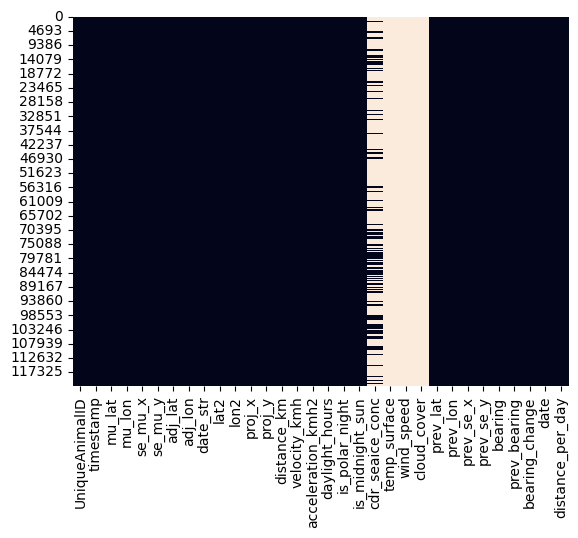

In [8]:
sns.heatmap(df.isnull(), cbar=False)

mirar con la libreria 'rerddapxtracto '


---

### 3. **Exploración geográfica y temporal**

* Rango de fechas (`timestamp`, `date`).
* Trayectorias o movimiento por individuo (`UniqueAnimalID`).
* Cobertura geográfica: distribución de puntos en lat/lon y por zona (`lat2`, `lon2`, `proj_x`, `proj_y`).


* **Unicidad de IDs** 

In [12]:
df.UniqueAnimalID.nunique()

173

In [34]:
df.UniqueAnimalID.unique()

array([120, 124, 211, 215, 260, 261, 263, 265, 276, 280, 286, 293, 297,
       300, 302, 304, 306, 310, 311, 313, 316, 320, 324, 326, 328, 339,
       344, 349, 351, 354, 355, 356, 358, 360, 361, 362, 363, 364, 365,
       367, 369, 370, 371, 373, 374, 375, 377, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 388, 389, 394, 395, 396, 397, 398, 399, 401,
       402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415,
       416, 418, 419, 422, 423, 425, 426, 427, 428, 430, 431, 432, 433,
       435, 436, 437, 438, 440, 441, 442, 443, 444, 447, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 463, 465, 466, 467, 468, 469,
       470, 471, 472, 473, 474, 475, 477, 478, 479, 480, 482, 483, 484,
       485, 486, 488, 489, 491, 492, 493, 495, 500, 501, 503, 505, 507,
       508, 510, 511, 512, 514, 515, 516, 517, 518, 519, 520, 521, 522,
       524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536,
       537, 539, 540, 541])

In [26]:
# df[df['UniqueAnimalID'] == 418].plot(x='mu_lon', y='mu_lat')

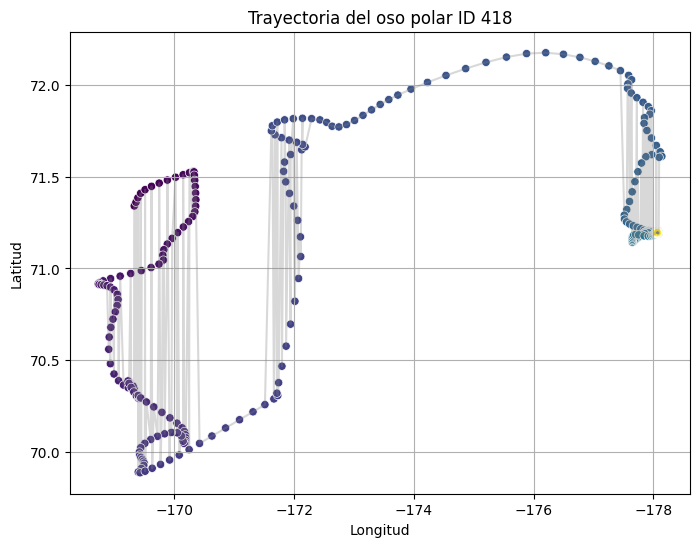

In [ ]:
# Filtrar por el ID deseado
df_418 = df[df['UniqueAnimalID'] == 418]

# Crear scatterplot con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_418, x='mu_lon', y='mu_lat', hue='timestamp', palette='viridis', legend=False)

# Opcional: conectamos los puntos en orden temporal
sns.lineplot(data=df_418, x='mu_lon', y='mu_lat', color='gray', alpha=0.3)

plt.title('Trayectoria del oso polar ID 418')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.gca().invert_xaxis()  # En mapas del Ártico, a veces conviene invertir eje X
plt.grid(True)
plt.show()


TODO: colorear por fecha, velocidad u otra variable como temperatura o hielo marino (`cdr_seaice_conc`)


* **Distribución temporal**: _timestamp, date, date_str_

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

print("Rango de fechas:", df['timestamp'].min(), "→", df['timestamp'].max())
df['timestamp'].dt.year.value_counts().sort_index()


Rango de fechas: 2007-07-01 00:00:00 → 2017-11-30 18:00:00


timestamp
2007     9748
2008    18827
2009    23881
2010    13987
2011    15166
2012     4423
2013     8790
2014     7344
2015    10045
2016     4482
2017     5321
Name: count, dtype: int64

In [32]:
# Registros por mes/año
# df['timestamp'].dt.to_period('M').value_counts().sort_index().plot()


In [33]:

df['month'] = df['timestamp'].dt.to_period('M').astype(str)
montly_counts = df.month.value_counts().sort_index()

monthly_df = montly_counts.reset_index()
# monthly_df


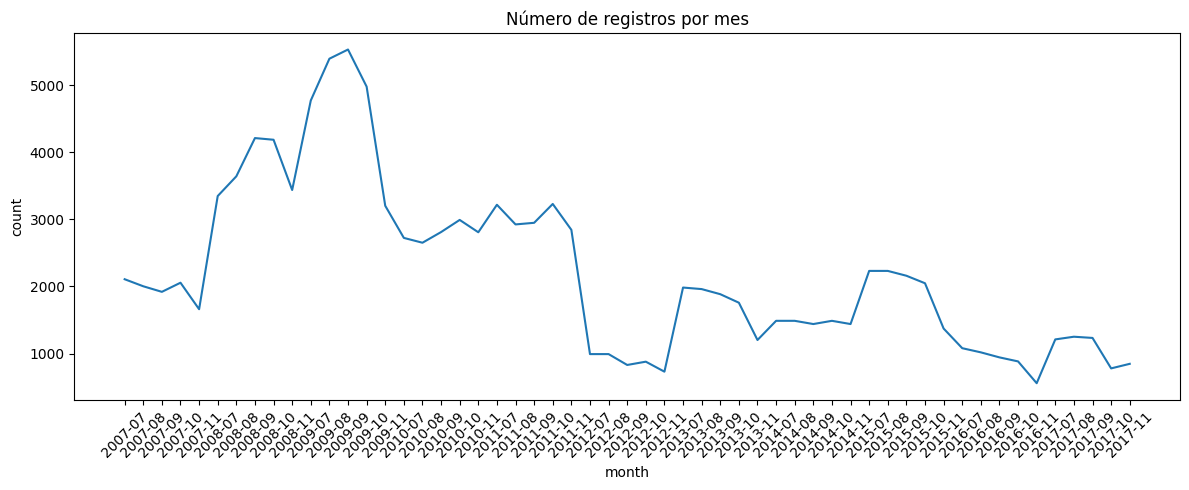

In [31]:
monthly_df.columns =['month', 'count']

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_df, x='month', y='count')
plt.xticks(rotation=45)
plt.title('Número de registros por mes')
plt.tight_layout()
plt.show();


---

### 2. **Análisis de calidad de datos**

* Buscar columnas con muchos nulos (como `temp_surface`, `wind_speed`, `cloud_cover`) y decidir si se imputan, se eliminan o se busca su fuente.
* Verificar duplicados.
* Validar rangos de coordenadas (`mu_lat`, `mu_lon`, `adj_lat`, `adj_lon`) y que no existan errores geográficos.


In [ ]:
# TODO


---

### 4. **Exploración por individuo**

* Número de registros por `UniqueAnimalID`.
* Longitud de trayectorias (en tiempo y espacio).
* Cambios de dirección (`bearing_change`) y sus patrones.


In [ ]:
df.groupby('UniqueAnimalID').size()

In [13]:
df.head()

UniqueAnimalID           timestamp   mu_lat    mu_lon  se_mu_x  \
134907             215 2009-08-19 06:00:00  70.8765 -152.5880      995   
134908             215 2009-08-19 12:00:00  70.8765 -152.5840     1080   
134909             215 2009-08-19 18:00:00  70.8765 -152.5775      493   
134910             215 2009-08-20 00:00:00  70.8750 -152.5720      273   
134911             215 2009-08-20 06:00:00  70.8693 -152.5407      974   

        se_mu_y  month  season  
134907      995      8  verano  
134908     1080      8  verano  
134909      493      8  verano  
134910      273      8  verano  
134911      974      8  verano

#### Heatmap por oso y estación

In [18]:
df[df.UniqueAnimalID == 311]

Empty DataFrame
Columns: [UniqueAnimalID, timestamp, mu_lat, mu_lon, se_mu_x, se_mu_y, month, season]
Index: []

In [4]:
import plotly.express as px

# df_filtrado = df[(df['id_oso'].isin(lista_osos)) & (df['año'] == año_seleccionado)]
df_filtrado = df[(df['UniqueAnimalID'] == 311)]

fig = px.scatter_mapbox(
    df_filtrado,
    lat="mu_lat",
    lon="mu_lon",
    color="season",  # Esto codifica por estación
    # animation_frame="año",  # Si lo deseas animado por año
    mapbox_style="carto-positron",
    zoom=3,
    height=600
)
fig.show()


NameError: name 'df' is not defined

In [ ]:
from ipyleaflet import Map, CircleMarker, LayerGroup, WidgetControl
import matplotlib.cm as cm
import ipywidgets as widgets
import pandas as pd
import numpy as np

# Supongamos que tu df tiene: 'latitud', 'longitud', 'season', 'año'

# 👉 Mapa base centrado en el Ártico
m = Map(center=(72, -150), zoom=3)

# 👉 Asignamos colores a las estaciones
estaciones = ['invierno', 'transición', 'verano']
colormap = cm.get_cmap('magma', len(estaciones))
norm = mcolors.Normalize(vmin=0, vmax=len(estaciones)-1)
colores = {est: mcolors.to_hex(colormap(norm(i))) for i, est in enumerate(estaciones)}

# 👉 Widget para elegir año
años_disponibles = sorted(df['año'].unique())
slider = widgets.SelectionSlider(
    options=años_disponibles,
    value=años_disponibles[0],
    description='Año:',
    continuous_update=False
)

# 👉 Capa dinámica de círculos
marcadores = LayerGroup()
m.add_layer(marcadores)

def actualizar_mapa(cambio):
    año = slider.value
    marcadores.clear_layers()
    df_filtrado = df[df['año'] == año]

    for _, row in df_filtrado.iterrows():
        color = colores.get(row['season'], '#888888')
        marker = CircleMarker(
            location=(row['latitud'], row['longitud']),
            radius=3,
            color=color,
            fill_opacity=0.6
        )
        marcadores.add_layer(marker)

# 👉 Conecta el slider al mapa
slider.observe(actualizar_mapa, names='value')

# 👉 Primera visualización
actualizar_mapa(None)

# 👉 Muestra todo
control = WidgetControl(widget=slider, position='topright')
m.add_control(control)
display(m)


KeyError: 'año'


---

### 5. **Distribución de variables clave**

* Histogramas / boxplots de:

  * `distance_km`, `velocity_kmh`, `acceleration_kmh2`
  * `daylight_hours`, `cdr_seaice_conc`, `distance_per_day`
* Comparación de distribuciones por época del año, individuo o región.


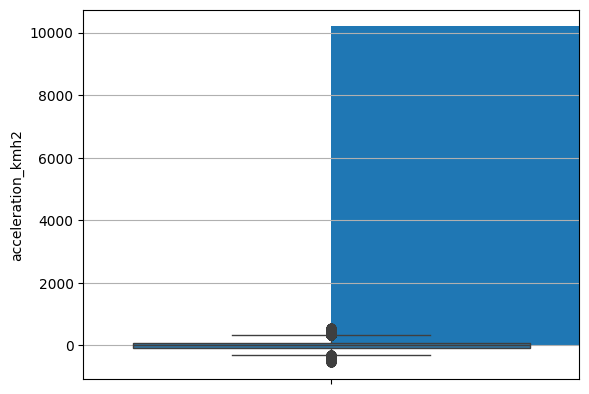

In [37]:
import matplotlib.pyplot as plt

# Histograma de velocidad
df['velocity_kmh'].hist(bins=50)

# Boxplot de aceleración
sns.boxplot(data=df, y='acceleration_kmh2');


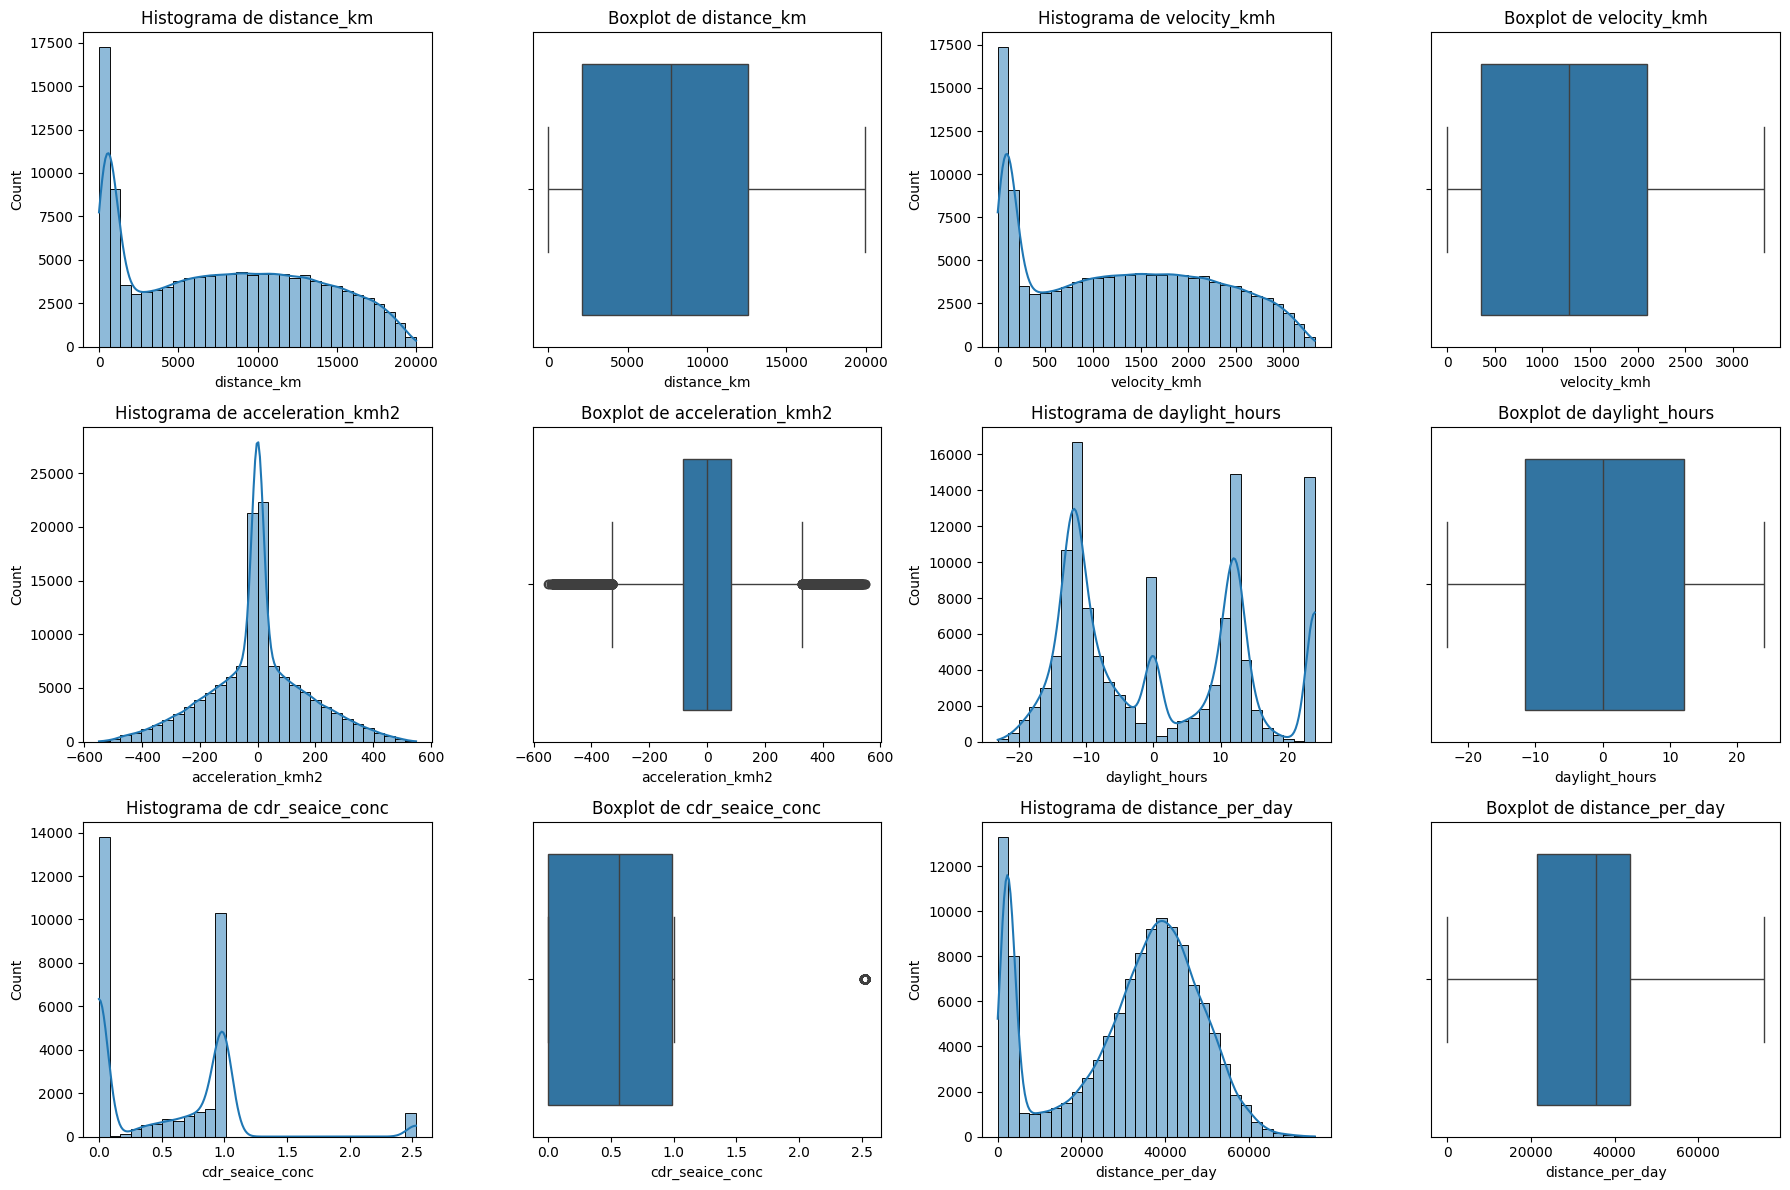

In [28]:
variables = [
    'distance_km',
    'velocity_kmh',
    'acceleration_kmh2',
    'daylight_hours',
    'cdr_seaice_conc',
    'distance_per_day'
]

plt.figure(figsize=(18, 12))

for i, var in enumerate(variables):
    plt.subplot(3, 4, 2*i+1)
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {var}')
    
    plt.subplot(3, 4, 2*i+2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


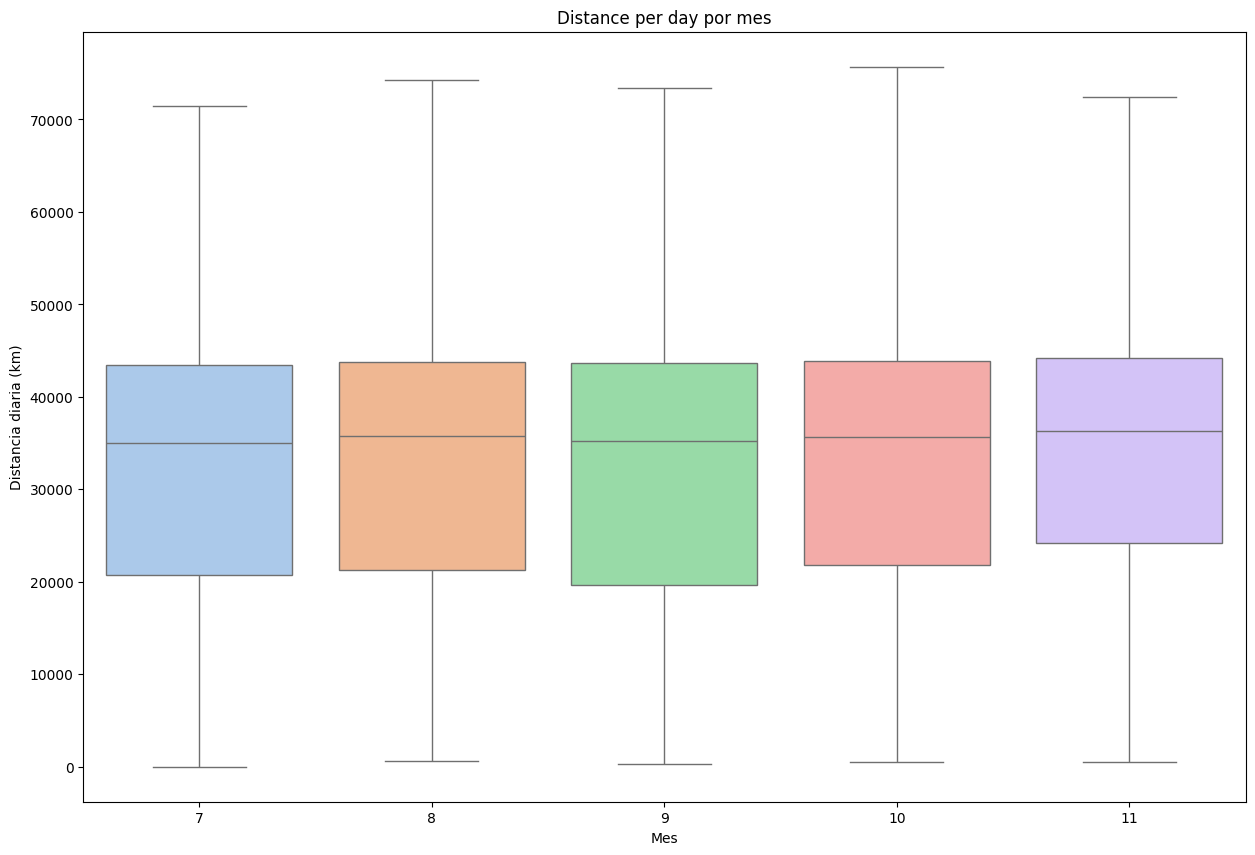

In [33]:
df['month'] = pd.to_datetime(df['date']).dt.month

plt.figure(figsize=(15, 10))
sns.boxplot(x='month', y='distance_per_day', data=df, palette='pastel')
plt.title('Distance per day por mes')
plt.xlabel('Mes')
plt.ylabel('Distancia diaria (km)')
plt.show()

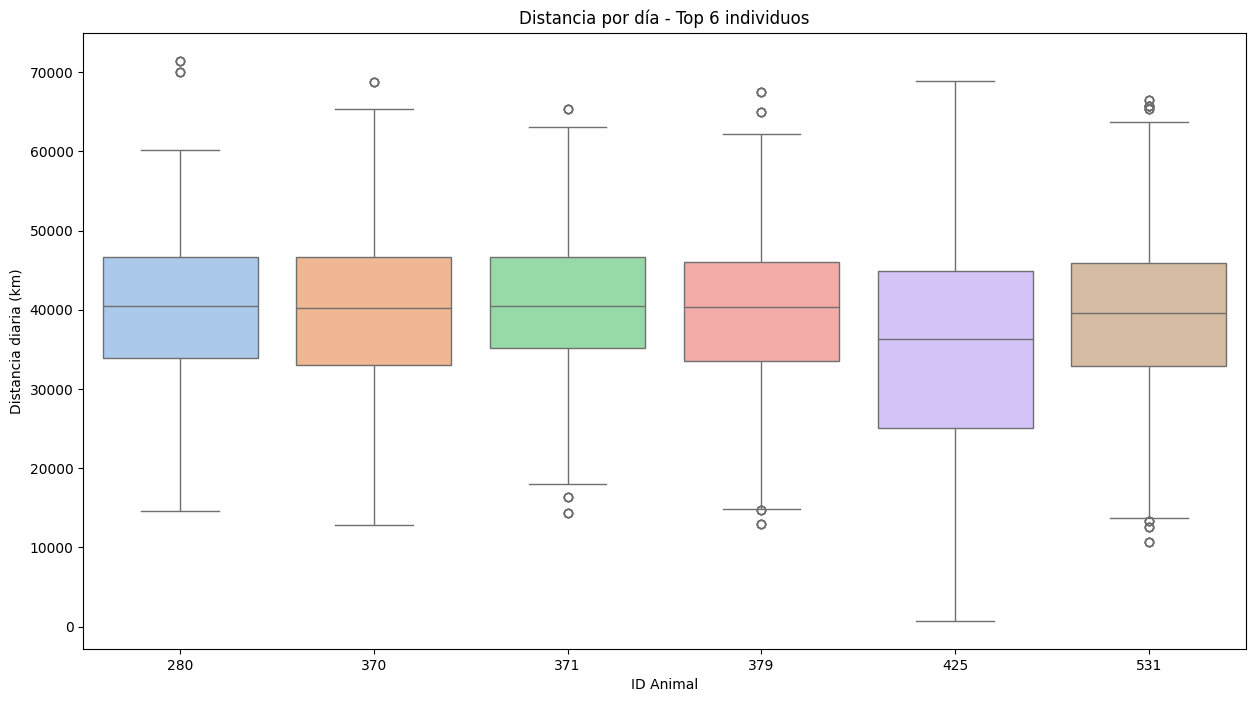

In [37]:
sample_ids = df['UniqueAnimalID'].value_counts().head(6).index.tolist()
plt.figure(figsize=(15, 8))
sns.boxplot(x='UniqueAnimalID', y='distance_per_day', data=df[df['UniqueAnimalID'].isin(sample_ids)] , palette='pastel')
plt.title('Distancia por día - Top 6 individuos')
plt.xlabel('ID Animal')
plt.ylabel('Distancia diaria (km)')
plt.show()



---

### 6. **Variables ambientales**

* Ver si `cdr_seaice_conc` tiene patrones por ubicación o fecha.
* Confirmar por qué otras variables ambientales (`temp_surface`, etc.) están vacías.
* Evaluar si deben recuperarse o descartarse.

---


<Axes: xlabel='cdr_seaice_conc', ylabel='velocity_kmh'>

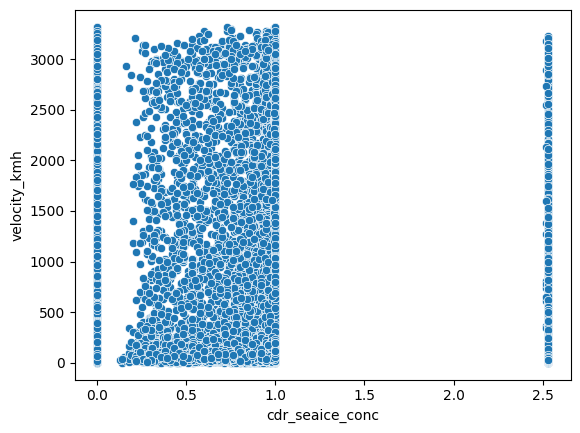

In [38]:
# Relación entre velocidad y concentración de hielo
sns.scatterplot(data=df, x='cdr_seaice_conc', y='velocity_kmh')



###  7. **Correlaciones e hipótesis iniciales**

* Matriz de correlación entre variables físicas y ambientales.
* Relación entre aceleración y cambios de dirección.
* Relación entre velocidad y horas de luz o concentración de hielo.

---

###  8. **Preparación para visualización**

* Muestras de trayectorias en mapas.
* Análisis de comportamiento en función de condiciones ambientales.
* Gráficos por individuo, día, región, estacionalidad.


<Axes: xlabel='lon2', ylabel='lat2'>

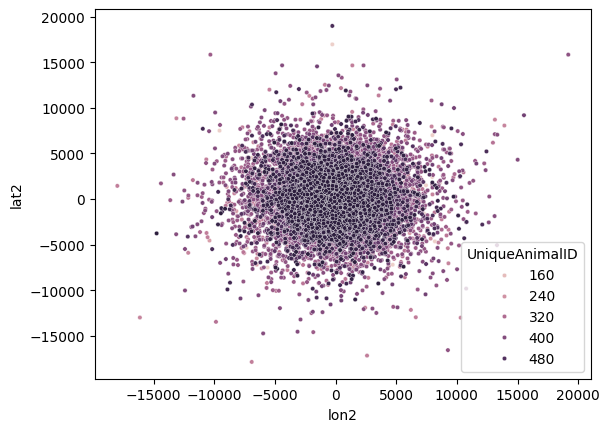

In [39]:
# Simple con geopandas o folium
# O con scatterplot si no necesitas mapa base
sns.scatterplot(data=df, x='lon2', y='lat2', hue='UniqueAnimalID', s=10);


In [42]:
# Subconjunto para no saturar el mapa (ajusta el número)
subset_ids = df['UniqueAnimalID'].unique()[:5]
df_subset = df[df['UniqueAnimalID'].isin(subset_ids)]

# Centro del mapa
center_lat = df_subset['lat2'].mean()
center_lon = df_subset['lon2'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=4, tiles='CartoDB positron')

# Crear un mapa de colores por ID
ids = list(df_subset['UniqueAnimalID'].unique())
colormap = cm.get_cmap('Set1', len(ids))
id_color_map = {uid: colors.rgb2hex(colormap(i)) for i, uid in enumerate(ids)}

# Añadir puntos codificados por color
for _, row in df_subset.iterrows():
    folium.CircleMarker(
        location=[row['lat2'], row['lon2']],
        radius=3,
        color=id_color_map[row['UniqueAnimalID']],
        fill=True,
        fill_opacity=0.7,
        popup=f"ID: {row['UniqueAnimalID']}, Fecha: {row['date_str']}"
    ).add_to(m)

# Mostrar mapa
m


C:\Users\Ana\AppData\Local\Temp\ipykernel_31572\4281879516.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Set1', len(ids))


In [ ]:
m = folium.Map(location=[df_subset['adj_lat'].mean(), df_subset['adj_lon'].mean()], zoom_start=4)
for _, row in df_subset.iterrows():
    folium.Marker(
        location=(row['adj_lat'], row['adj_lon']),
        popup=f"ID: {row['UniqueAnimalID']}<br>Fecha: {row['date_str']}"
    ).add_to(m)

m


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Seleccionar un oso
bear = df[df['UniqueAnimalID'] == 418]

# Crear figura con proyección polar estereográfica norte
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Agregar elementos geográficos
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Plotear la trayectoria
ax.plot(
    bear['mu_lon'], bear['mu_lat'],
    transform=ccrs.PlateCarree(),
    marker='o', markersize=2, linewidth=1,
    label='Trayectoria Oso 418'
)

plt.title('Trayectoria del oso polar (ID 418)')
plt.legend()
plt.show();


NameError: name 'df' is not defined

In [2]:
print(df[['adj_lat', 'adj_lon']].describe())

NameError: name 'df' is not defined

In [3]:
# 2. Filtrar por latitudes > 60° N (zona ártica)
df_arctic = df[df['adj_lat'] > 60]
len(df_arctic)


NameError: name 'df' is not defined

In [15]:

# 3. Ver puntos fuera de rango
df_outliers = df[df['adj_lat'] < 40]
len(df_outliers)

41029


---

- ¿pairplot? distribucion
- heatmap ... corr
- outliers?
